In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as sm
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

c:\Users\Cat\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_hypo3 = pd.read_csv('./Data/cleaned_hypo3.csv')

# Hypotese 3 (CovidData)

### "We do not believe that development of a  country (hdi) correlates to how exposed a county is to infection"



In [3]:
#Copy necessary data
# Copy columns
print(data_hypo3.columns)
data_hypothesis_3 = data_hypo3[['human_development_index', 'total_cases', 'location', 'date']]


# Check the data to see if it looks good
print(data_hypothesis_3.head())

Index(['iso_code', 'location', 'total_cases', 'human_development_index',
       'date', 'location_y', 'year'],
      dtype='object')
   human_development_index  total_cases     location        date
0                    0.511          1.0  Afghanistan  2020-03-01
1                    0.511          1.0  Afghanistan  2020-03-01
2                    0.511          1.0  Afghanistan  2020-03-01
3                    0.511          1.0  Afghanistan  2020-03-01
4                    0.511          1.0  Afghanistan  2020-03-02


In [4]:
# get the last row for each country
last_row = data_hypothesis_3.groupby('location').last().reset_index()
last_row.sample(5)

,location,human_development_index,total_cases,date
162,Suriname,0.738,82496.0,2024-02-18
78,Iran,0.783,7627186.0,2024-02-18
158,South Sudan,0.433,18819.0,2024-02-18
119,Netherlands,0.944,8635061.0,2024-02-18
94,Lesotho,0.527,36138.0,2024-02-18


In [5]:
#  Reshaping the 'human_development_index' and 'total_cases' data 
#  into a format suitable for machine learning models.
#  X contains the 'human_development_index' values, reshaped to a single column.
#  y contains the 'total_cases' values, reshaped to a single column.

X = last_row['human_development_index'].values.reshape(-1, 1);
y = last_row['total_cases'].values.reshape(-1, 1);


In [6]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

c:\Users\Cat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'

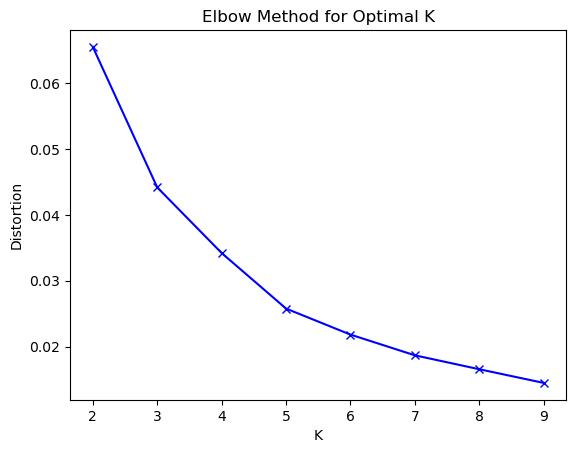

In [ ]:
# Plot the distortion to discover the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

From the graph, think the best K is 5

In [ ]:
# Optimal number of clusters K
num_clusters = 6

In [ ]:
# next we create the KMeans model and fit it to the data 
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)

kmeans.fit(X)

c:\Users\Marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=6, n_init=20)

In [ ]:
# Calculating silhouette scores for different values of K (number of clusters)
# in KMeans clustering to determine the optimal number of clusters.
scores = []
K = range(2,10)
for k in K:
    # Create a KMeans model with k clusters and fit it to the data.
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    scores.append(score)

c:\Users\Marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



c:\Users\Marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

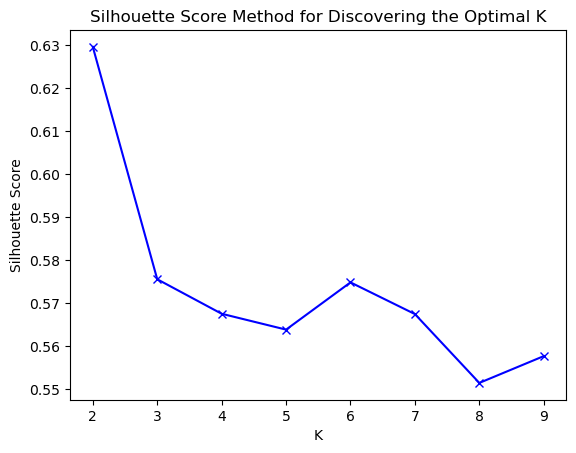

In [ ]:
# Plot the elbow
plt.title('Silhouette Score Method for Discovering the Optimal K')
plt.plot(K, scores, 'bx-')
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

When looking at the graph the best number of clusters is 6 when we use Silhouette method.

In [ ]:
# Predict the clusters for each observation
predictions = kmeans.predict(X)
print(predictions)

[1 5 2 5 1 2 5 2 0 0 2 5 5 3 5 5 0 2 1 3 2 2 2 2 5 5 4 4 3 1 0 3 4 4 5 2 2
 1 1 5 1 5 2 0 0 4 0 1 2 2 2 2 3 3 4 0 3 4 2 0 0 2 4 5 0 3 0 2 3 4 4 3 1 3
 5 0 3 2 2 3 0 0 0 2 0 2 5 3 3 5 2 3 5 2 1 4 2 0 0 0 1 4 5 2 4 0 2 1 5 2 3
 2 2 5 3 4 1 3 3 0 0 3 4 1 2 0 5 1 5 2 5 1 2 2 2 0 5 5 5 5 1 2 2 2 2 5 3 5
 1 5 5 4 0 5 0 1 2 0 4 0 2 1 2 0 0 1 3 1 2 3 1 2 5 2 5 3 1 2 0 0 0 5 2 3 2
 2 4 1 1]


In [ ]:
# Add the cluster labels to the last_row dataframe
last_row['cluster_label'] = kmeans.labels_

In [ ]:
# test if the labels are added correctly to the dataset, with a singapore (chosen randomly) as an example
singapore = last_row[last_row['location'] == 'Singapore']
test_input = singapore['human_development_index'].values.reshape(-1, 1)
test_prediction = kmeans.predict(test_input)
print(f"test cluster: {test_prediction}, actual cluster: {singapore['cluster_label'].values}")

test cluster: [0], actual cluster: [0]


Cluster  0 :  (34, 5)


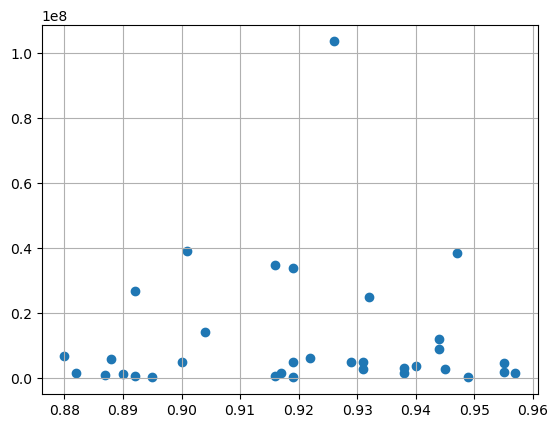

Cluster  1 :  (26, 5)


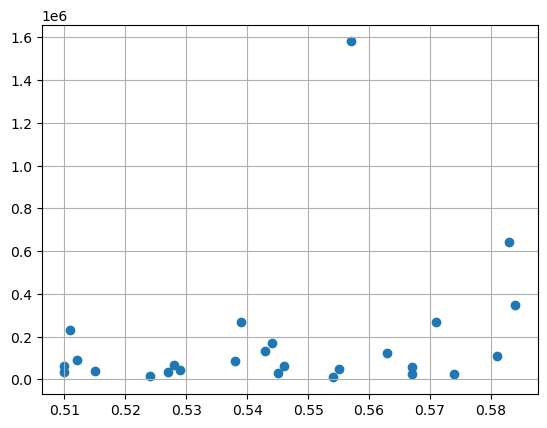

Cluster  2 :  (50, 5)


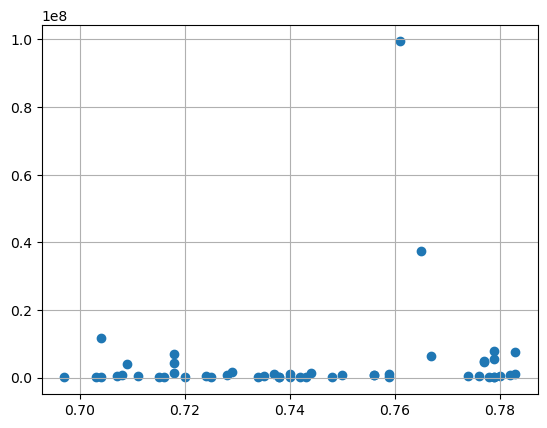

Cluster  3 :  (26, 5)


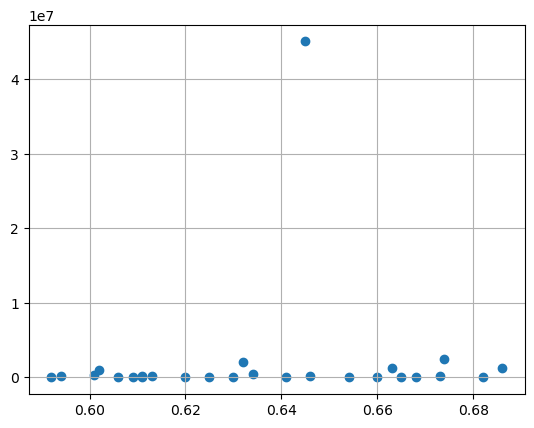

Cluster  4 :  (18, 5)


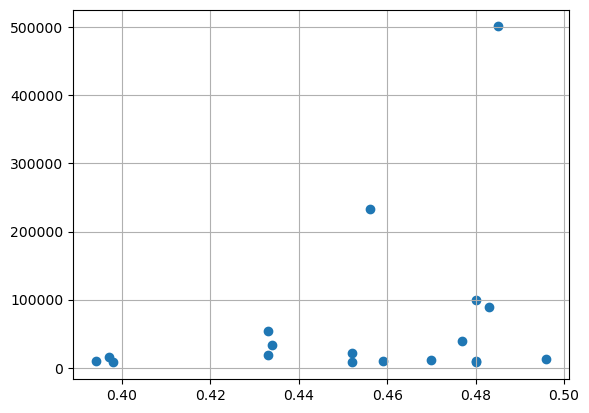

Cluster  5 :  (35, 5)


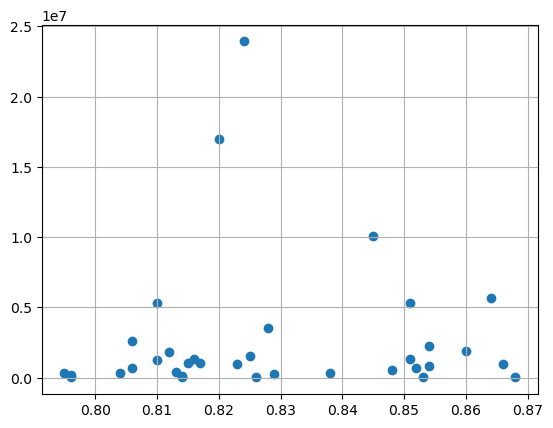

In [ ]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = last_row[last_row['cluster_label'] == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster['human_development_index'].values.reshape(-1, 1), cluster['total_cases'].values.reshape(-1, 1))   
    plt.grid(True)
    plt.show()

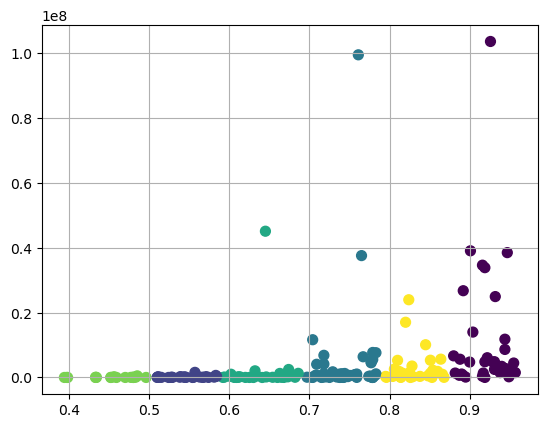

[[0.92058824]
 [0.54526923]
 [0.74384   ]
 [0.63603846]
 [0.45327778]
 [0.82865714]]


In [ ]:
# Plot the clusters with colors representing different clusters
plt.scatter(last_row['human_development_index'].values.reshape(-1, 1), last_row['total_cases'].values.reshape(-1, 1), c=predictions, s=50, cmap='viridis')
plt.grid(True)
plt.show()

# Print cluster centers
print(kmeans.cluster_centers_)

In [ ]:
print(kmeans.cluster_centers_)

[[0.92058824]
 [0.54526923]
 [0.74384   ]
 [0.63603846]
 [0.45327778]
 [0.82865714]]


In [ ]:
# first column
x_min = X.min()
x_max = X.max()

# second column
y_min = y.min()
y_max = y.max()

In [ ]:
#%pip install yellowbrick

In [ ]:
# Import the SilhouetteVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Instantiate a visualizer with the number of clusters
k = 6
model = KMeans(n_clusters=k, n_init=10)
model.fit_predict(X)

c:\Users\Marcus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



array([1, 0, 3, 0, 1, 3, 0, 3, 4, 4, 3, 0, 0, 2, 0, 0, 4, 3, 1, 2, 3, 3,
       3, 3, 0, 0, 5, 5, 2, 1, 4, 2, 5, 5, 0, 3, 3, 1, 1, 0, 1, 0, 3, 4,
       4, 5, 4, 1, 3, 3, 3, 3, 2, 2, 5, 4, 2, 5, 3, 4, 4, 3, 5, 0, 4, 2,
       4, 3, 2, 5, 5, 2, 1, 2, 0, 4, 2, 3, 3, 2, 4, 4, 4, 3, 4, 3, 0, 2,
       2, 0, 3, 2, 0, 3, 1, 5, 3, 4, 4, 4, 1, 5, 0, 3, 5, 4, 3, 1, 0, 3,
       2, 3, 3, 0, 2, 5, 1, 2, 2, 4, 4, 2, 5, 1, 3, 4, 0, 1, 0, 3, 0, 1,
       3, 3, 3, 4, 0, 0, 0, 0, 1, 3, 3, 3, 3, 0, 2, 0, 1, 0, 0, 5, 4, 0,
       4, 1, 3, 4, 5, 4, 3, 1, 3, 4, 4, 1, 2, 1, 3, 2, 1, 3, 0, 3, 0, 2,
       1, 3, 4, 4, 4, 0, 3, 2, 3, 3, 5, 1, 1])

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Calculate the silhouette score
score = silhouette_score(X, model.labels_, metric='euclidean')
print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.575


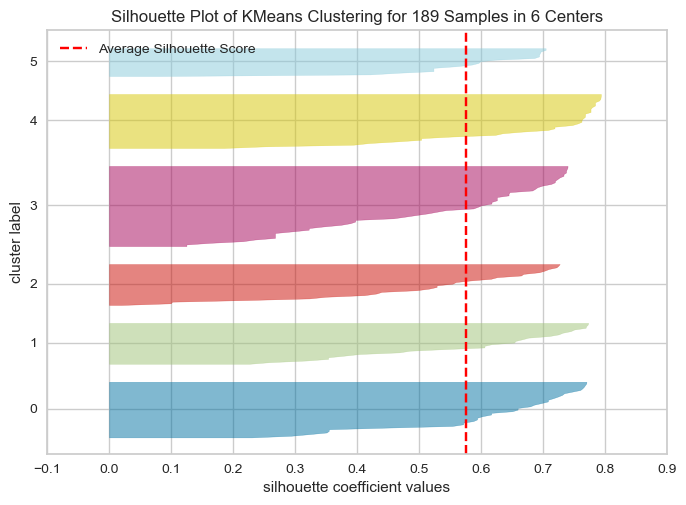

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 189 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Visualize the silhouette scores of all points
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()  

In [ ]:
# Convert the dataset into array
array = last_row[['human_development_index', 'total_cases', 'cluster_label']].values

In [ ]:
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [ ]:
# Separate input data into classes based on labels
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])
class5 = np.array(X[y==5])

In [ ]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.2

In [ ]:
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [ ]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [ ]:
params = {'max_depth': 6}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
#Install the graphviz package
# %pip install graphviz
# %conda install python-graphviz

In [ ]:
amount_class0 = len(class0)
amount_class1 = len(class1)
amount_class2 = len(class2)
amount_class3 = len(class3)
amount_class4 = len(class4)
amount_class5 = len(class5)

print(f"Amount of class 0: {amount_class0}")
print(f"Amount of class 1: {amount_class1}")
print(f"Amount of class 2: {amount_class2}")
print(f"Amount of class 3: {amount_class3}")
print(f"Amount of class 4: {amount_class4}")
print(f"Amount of class 5: {amount_class5}")

Amount of class 0: 34
Amount of class 1: 26
Amount of class 2: 50
Amount of class 3: 26
Amount of class 4: 18
Amount of class 5: 35


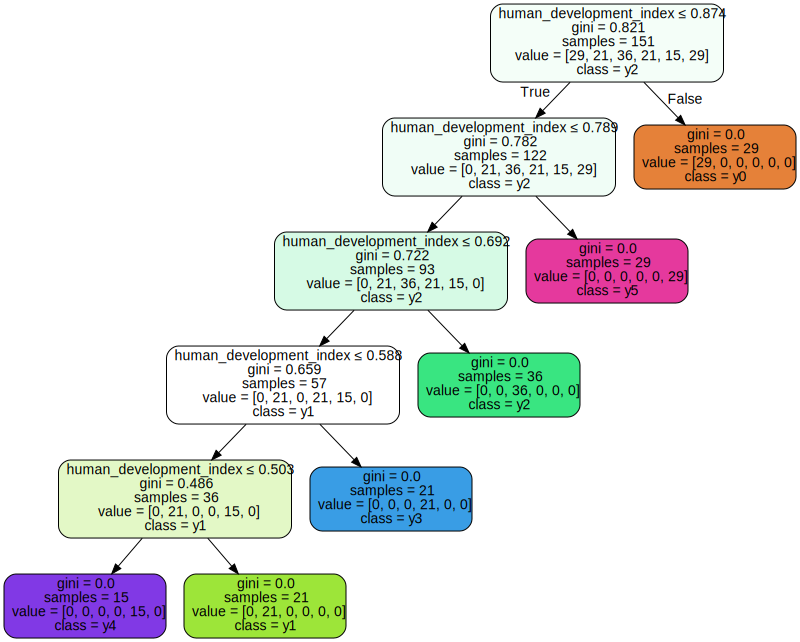

In [ ]:
# draw tree from the trained data by graphviz package
import graphviz
gr_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=['human_development_index', 'total_cases'], class_names = True,        
                         filled=True, rounded=True, proportion = False, special_characters=True)  
dtree = graphviz.Source(gr_data) 
dtree 

In [ ]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([2., 1., 0., 5., 5., 2., 1., 1., 2., 2., 2., 0., 1., 2., 2., 3., 4.,
       5., 4., 2., 1., 2., 2., 2., 2., 0., 2., 2., 3., 3., 0., 5., 0., 3.,
       5., 4., 3., 5.])

In [ ]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  1.0


In [ ]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[ 5,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

In [ ]:
confusion = pd.crosstab(y_test,y_testp)
confusion

col_0,0.0,1.0,2.0,3.0,4.0,5.0
row_0,,,,,,
0.0,5,0,0,0,0,0
1.0,0,5,0,0,0,0
2.0,0,0,14,0,0,0
3.0,0,0,0,5,0,0
4.0,0,0,0,0,3,0
5.0,0,0,0,0,0,6


In [ ]:
# Classifier performance on training dataset
class_names = ['Class0', 'Class1', 'Class2','Class3', 'Class4', 'Class5']
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

      Class0       1.00      1.00      1.00        29
      Class1       1.00      1.00      1.00        21
      Class2       1.00      1.00      1.00        36
      Class3       1.00      1.00      1.00        21
      Class4       1.00      1.00      1.00        15
      Class5       1.00      1.00      1.00        29

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151



In [ ]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# test the model on the test set
model.score(X_test, y_test)

0.18421052631578946

#### Decision Tree model:

Accuracy: The Decision Tree model achieved an accuracy of 78.95%. This means that 78.95% of the predictions made by the model on the test dataset were correct. In other words, the model could correctly classify 78.95% of the cases it was presented with.

#### Naive Bayes model:

 Accuracy: The Naive Bayes model achieved an accuracy of 18.42%. This indicates that only 18.42% of the predictions made by the model were correct on the test dataset. Therefore, the model had a low performance level compared to the decision tree.